# Import all the modules

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import math

# Download Data

In [2]:
import gdown

In [3]:
gdown.download_folder(url="https://drive.google.com/drive/folders/1AAI2a2BmafbeVExLH-l0aZgvPgJCk5Xm", output="/Volumes/D/Intro to Deep Learning/downsampling_in_deep_ISR/data", quiet=False)

Retrieving folder list


Processing file 1h3H0Vm4yvMVVQgpJk3s0a304FTpOZGKg Flickr2K.zip
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1h3H0Vm4yvMVVQgpJk3s0a304FTpOZGKg
To: /Volumes/D/Intro to Deep Learning/downsampling_in_deep_ISR/data/Flickr2K.zip
100%|██████████| 11.6G/11.6G [09:25<00:00, 20.6MB/s]
Download completed


['/Volumes/D/Intro to Deep Learning/downsampling_in_deep_ISR/data/Flickr2K.zip']

In [4]:
gdown.download_folder(url="https://drive.google.com/drive/u/1/folders/1Rqb5Poe5oe2R7vFJhk9jw_ksxClYufsZ", output="/Volumes/D/Intro to Deep Learning/downsampling_in_deep_ISR/data", quiet=False)

Retrieving folder list


Processing file 1SGwIP3DyCghESgI65bL0-jil0hh1GqGT DIV2K_train_HR.zip
Processing file 1x1iAImSPnSwNRcgFbrpWZBqiMP37rIbN DIV2K_valid_HR.zip
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1SGwIP3DyCghESgI65bL0-jil0hh1GqGT
To: /Volumes/D/Intro to Deep Learning/downsampling_in_deep_ISR/data/DIV2K_train_HR.zip
100%|██████████| 3.53G/3.53G [02:51<00:00, 20.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1x1iAImSPnSwNRcgFbrpWZBqiMP37rIbN
To: /Volumes/D/Intro to Deep Learning/downsampling_in_deep_ISR/data/DIV2K_valid_HR.zip
100%|██████████| 449M/449M [00:24<00:00, 18.7MB/s] 
Download completed


['/Volumes/D/Intro to Deep Learning/downsampling_in_deep_ISR/data/DIV2K_train_HR.zip',
 '/Volumes/D/Intro to Deep Learning/downsampling_in_deep_ISR/data/DIV2K_valid_HR.zip']

# unzip files

In [6]:
# import zipfile

# if  os.path.exists("data/DIV2K_train_HR.zip/"):
#     with zipfile.ZipFile("data/DIV2k_train_HR.zip", 'r') as zip_ref:
#         zip_ref.extractall("data/DIV2k_train_HR")

# if os.path.exists("data/DIV2k_valid_HR.zip/"):
#     with zipfile.ZipFile("data/DIV2k_valid_HR.zip", 'r') as zip_ref:
#         zip_ref.extractall("data/DIV2k_valid_HR")

# if os.path.exists("data/Flickr2k.zip/"):
#     with zipfile.ZipFile("data/Flickr2k.zip", 'r') as zip_ref:
#         zip_ref.extractall("data/Flickr2k")

In [1]:
# remove zip files
if os.path.exists("data/DIV2k_train_HR.zip"):
    os.remove("data/DIV2k_train_HR.zip")

if os.path.exists("data/DIV2k_valid_HR.zip"):
    os.remove("data/DIV2k_valid_HR.zip")

if os.path.exists("data/Flickr2k.zip"):
    os.remove("data/Flickr2k.zip")

In [2]:
# add raw folder to data and unload the folders to raw
os.mkdir("data/raw")
os.rename("data/DIV2k_train_HR", "data/raw/DIV2k_train_HR")
os.rename("data/DIV2k_valid_HR", "data/raw/DIV2k_valid_HR")
os.rename("data/Flickr2k", "data/raw/Flickr2k")


In [3]:
# unload folders to raw
import shutil

for folder in os.listdir("data/raw/DIV2k_train_HR"):
    shutil.move("data/raw/DIV2k_train_HR/" + folder, "data/raw")

for folder in os.listdir("data/raw/DIV2k_valid_HR"):
    shutil.move("data/raw/DIV2k_valid_HR/" + folder, "data/raw")

for folder in os.listdir("data/raw/Flickr2k"):
    shutil.move("data/raw/Flickr2k/" + folder, "data/raw")


In [4]:
# remove the folders
os.rmdir("data/raw/DIV2k_train_HR")
os.rmdir("data/raw/Flickr2k")
os.rmdir("data/raw/DIV2k_valid_HR")

# Make Train and Test Folders

In [5]:
# make train and test folders
os.mkdir("data/raw/train")
os.mkdir("data/raw/test")

In [6]:
# load all images to train
for folder in os.listdir("data/raw"):
    shutil.move("data/raw/" + folder, "data/raw/train")

In [7]:
# move test folder to raw
shutil.move("data/raw/train/test", "data/raw/test")

'data/raw/test'

# Split Directory

In [ ]:
def split_directory(ratio=0.2):
    # get the directory of data files
    data_dir = os.path.join(os.getcwd(), 'data')
    raw_dir = os.path.join(data_dir, 'raw')
    # get the train directory and split to 20% test and 80% train
    train_dir = os.path.join(raw_dir, 'train')
    test_dir = os.path.join(raw_dir, 'test')

    # get the train and move to test directory 20% of the data
    train_images = os.listdir(train_dir)
    test_images = train_images[:int(len(train_images)*ratio)]
    for image in test_images:
        os.rename(os.path.join(train_dir, image), os.path.join(test_dir, image))

split_directory()

# Visualize Data

In [2]:
import cv2
import PIL 
from PIL import Image

In [49]:
# get train dir and test dir
data_dir = os.path.join(os.getcwd(), 'data')
raw_dir  = os.path.join(data_dir, 'raw')
train_dir = os.path.join(raw_dir, 'train')
test_dir = os.path.join(raw_dir, 'test')


# get the train and test images
train_images = os.listdir(train_dir)
test_images = os.listdir(test_dir)

# visualize the images
def visualize_images(images, labels, rows=3, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax, label in zip(images, axes, labels):
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

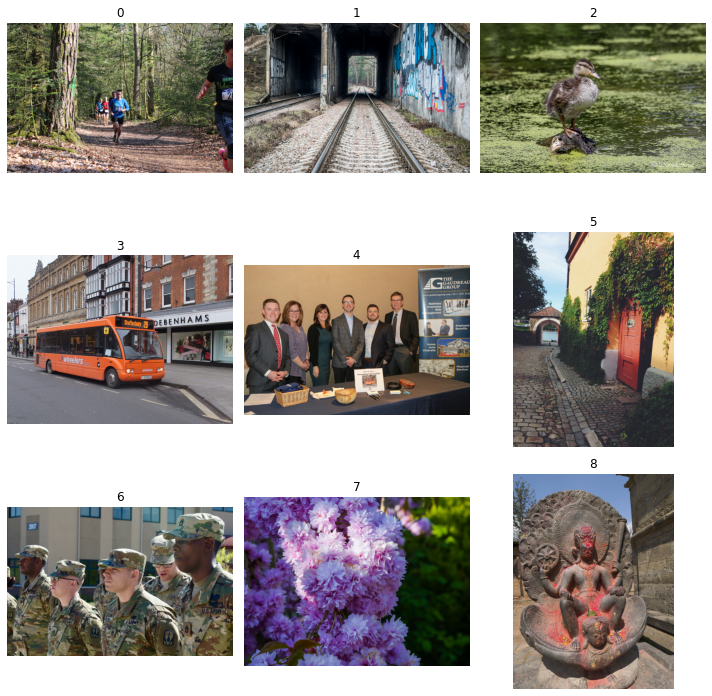

In [50]:
train_images = os.listdir(train_dir)


visualize_images([PIL.Image.open(os.path.join(train_dir, image)) for image in train_images[:9]], [i for i in range(9)])

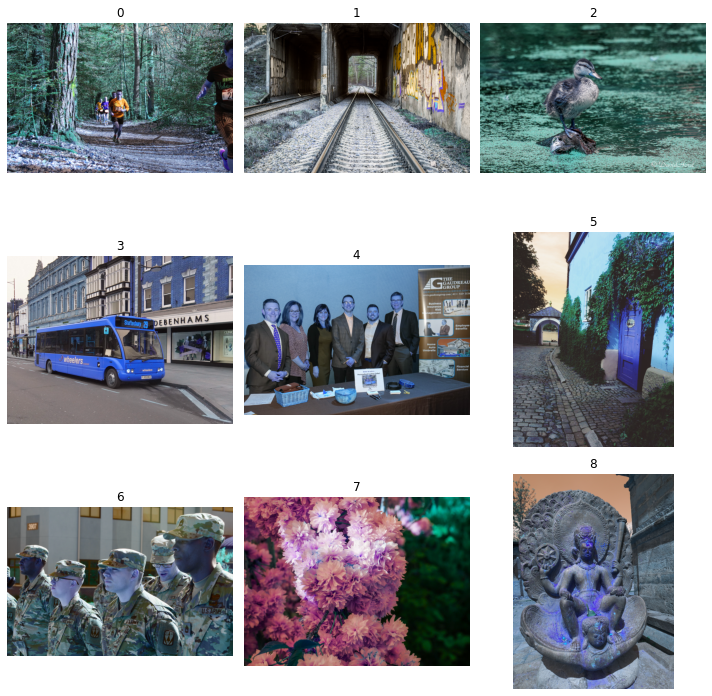

In [51]:
# resize the images from train and test dirs
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

# resize the images train dir
images = []
for image in train_images:
    image_path = os.path.join(train_dir, image)
    image = cv2.imread(image_path)
    # change the color to rgb
    image = image_resize(image, width=1084)
    images.append(image)
visualize_images(images, [i for i in range(9)])

In [52]:
# check if the width is 1084
for image in images:
    assert image.shape[1] == 1084

In [53]:
import heapq

def find_smallest_height(images):
    height = 100000
    for image in images:
        if image.shape[0] < height:
            height = image.shape[0]
    return height

def find_n_smallest_height(images, n=10):
    height = []
    for image in images:
        heapq.heappush(height, image.shape[0])
    return heapq.nsmallest(n, height)[-1]

print(find_smallest_height(images))
for i in range(1, 100 + 1):
    print(find_n_smallest_height(images, i))

344
344
388
395
408
414
433
452
459
471
471
497
503
510
510
510
516
538
538
542
542
542
542
542
548
551
554
554
554
554
558
561
561
567
567
567
567
567
567
567
570
573
573
573
575
580
580
580
580
580
580
581
583
583
586
586
586
586
593
593
593
599
599
599
599
599
599
599
599
599
603
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605


In [54]:
# remove the images that are smaller than 500 height
def remove_images(images, height):
    for image in images:
        if image.shape[0] < height:
            images.remove(image)
    return images

images = remove_images(images, 500)
print(find_smallest_height(images))
print(len(images))

503
3539


C:\Users\Suren\AppData\Local\Temp\ipykernel_27328\28100874.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  images.remove(image)


In [55]:
# crop the images to 492 height and 1080 width
def crop_images(images, height, width):
    cropped_images = []
    for image in images:
        cropped_images.append(image[:height, :width])
    return cropped_images

images = crop_images(images, 492, 1080)

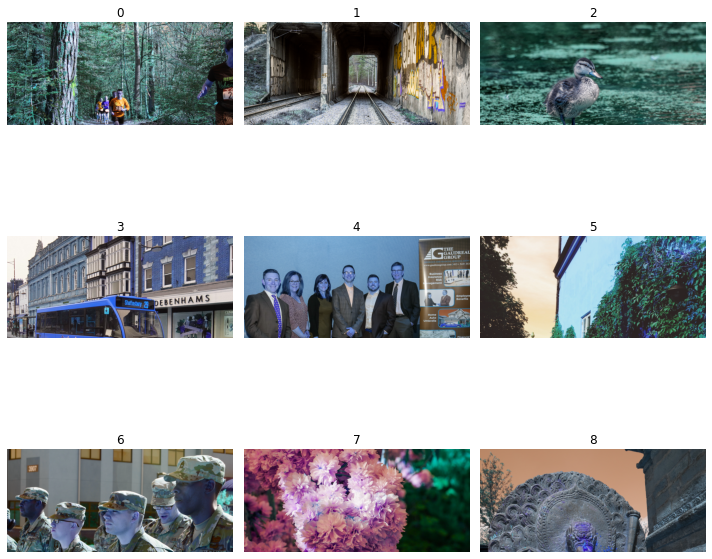

In [56]:
visualize_images(images, [i for i in range(9)])

In [57]:
# save the images into a new directory
def save_images(images, directory):
    for i in range(len(images)):
        cv2.imwrite(os.path.join(directory, f'image_{i}.jpg'), images[i])


# Save The Original Data

In [58]:
# save images into train dirs in directory named original
original_dir = os.path.join(data_dir, 'original')
train_original_dir = os.path.join(original_dir, 'train')

# print(train_og_images)

# save_images(images, train_original_dir)
train_og_images = os.listdir(train_original_dir)
print(train_original_dir)

d:\programming\python\Deep learning\downsampling_in_deep_ISR\data\original\train


# Preprocessing

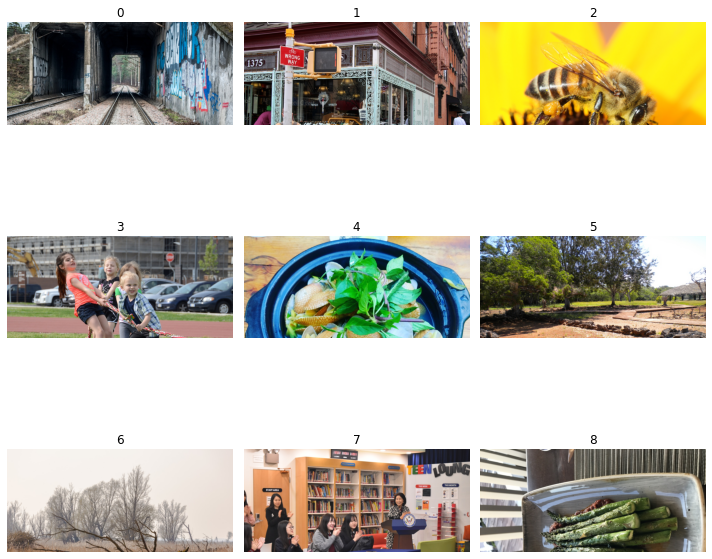

In [59]:
visualize_images([PIL.Image.open(os.path.join(train_original_dir, image)) for image in train_og_images[1:10]], [i for i in range(9)])

(492, 1080, 3)


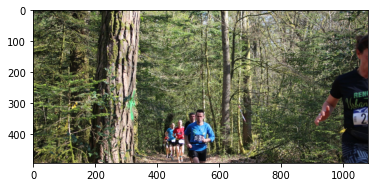

In [60]:
debug_img = cv2.imread(os.path.join(train_original_dir, train_og_images[0]))

#change the color to rgb
debug_img = cv2.cvtColor(debug_img, cv2.COLOR_BGR2RGB)

#plot debug_img
plt.imshow(debug_img)

print(debug_img.shape)



# Build Avg Pool Dataset

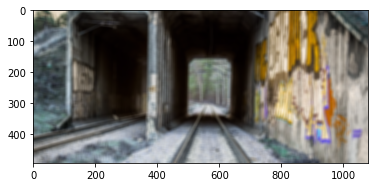

In [61]:
if not os.path.isdir('data/processed'):
    os.mkdir('data/processed')
preprocessed_dir = 'data/processed'

if not os.path.isdir('data/processed/avg_pool/'):
    os.mkdir('data/processed/avg_pool/')
avg_pool_dir = 'data/processed/avg_pool'

if not os.path.isdir('data/processed/avg_pool/train'):
    os.mkdir('data/processed/avg_pool/train')
avg_pool_train_dir = 'data/processed/avg_pool/train'

if not os.path.isdir('data/processed/high_res'):
    os.mkdir('data/processed/high_res')
corresponding_HR_image_DIR = 'data/processed/high_res'




def avg_pool(image):
    kernel = np.ones((12,12),np.float32)/144
    avg_pooled = cv2.filter2D(image,-1,kernel)

    return avg_pooled
# plt.imshow(avg_pool(debug_img))

avg_pool_images = []
high_res_images = []
for images in train_og_images[1:]:
    #read image
    image = cv2.imread(os.path.join(train_original_dir, images))
    high_res_images.append(image)
    image = avg_pool(image)
    avg_pool_images.append(image)
plt.imshow(avg_pool_images[0])
save_images(avg_pool_images, avg_pool_train_dir)
save_images(high_res_images, corresponding_HR_image_DIR)


# Build Max Pool Dataset

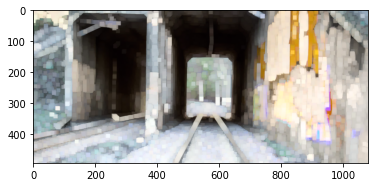

In [63]:
if not os.path.isdir('data/processed/max_pool/'):
    os.mkdir('data/processed/max_pool/')
max_pool_dir = 'data/processed/max_pool'

if not os.path.isdir('data/processed/max_pool/train'):
    os.mkdir('data/processed/max_pool/train')
max_pool_train_dir = 'data/processed/max_pool/train'


def max_pool(image):
    kernel_max = np.ones((12,12),np.float32)
    max_pooled = cv2.dilate(image,kernel_max,iterations = 1)
    # plt.imshow(max_pooled)
    return max_pooled 
# plt.imshow(avg_pool(debug_img))

max_pool_images = []
for images in train_og_images[1:]:
    #read image
    image = cv2.imread(os.path.join(train_original_dir, images))
    image = max_pool(image)
    max_pool_images.append(image)
plt.imshow(max_pool_images[0])
save_images(max_pool_images, max_pool_train_dir)


# Build Nearest Neighbor Interpolation Dataset

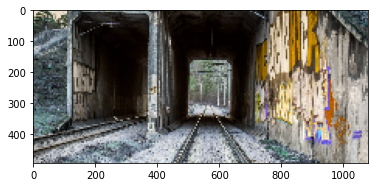

In [64]:
if not os.path.isdir('data/processed/NN_interpolation/'):
    os.mkdir('data/processed/NN_interpolation/')
NN_interpolation_dir = 'data/processed/NN_interpolation'

if not os.path.isdir('data/processed/NN_interpolation/train'):
    os.mkdir('data/processed/NN_interpolation/train')
NN_interpolation_train_dir = 'data/processed/NN_interpolation/train'

corresponding_HR_image_DIR = 'data/processed/high_res'


def NN_Interpolation(image, scale_x = 0.2, scale_y = 0.2):
    NN_downsized = cv2.resize(image, None, fx = scale_x, fy = scale_y, interpolation = cv2.INTER_NEAREST)
    NN_interpolated = cv2.resize(NN_downsized,(1080, 492), interpolation = cv2.INTER_NEAREST)
    # plt.imshow(NN_interpolated)
    return NN_interpolated 

NN_interpolated_images = []
for images in train_og_images[1:]:
    image = cv2.imread(os.path.join(train_original_dir, images))
    image = NN_Interpolation(image)
    NN_interpolated_images.append(image)

plt.imshow(NN_interpolated_images[0])
save_images(NN_interpolated_images, NN_interpolation_train_dir)



# Corresponding High-Res Image DIR ground truth labels of all datasets

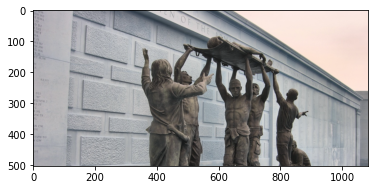

In [30]:
plt.imshow(high_res_images[0])

if not os.path.isdir('data/processed/high_res_test'):
    os.mkdir('data/processed/high_res_test')
high_res_corresponding_test = 'data/processed/high_res_test'




# Create Avg Pool Train/Validation and Test

2830
3538
2830 708
3538
3538


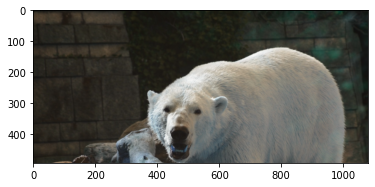

In [62]:
num_train_validation_examples = math.floor(len(os.listdir(corresponding_HR_image_DIR))*0.8)
list_corresponding_HR_image_DIR = os.listdir(corresponding_HR_image_DIR)
train_validation_examples = list_corresponding_HR_image_DIR[:num_train_validation_examples]
print(num_train_validation_examples)
print(len(list_corresponding_HR_image_DIR))
test_examples = list_corresponding_HR_image_DIR[num_train_validation_examples:]
# print(os.listdir(corresponding_HR_image_DIR[num_train_examples:]))
# test_examples = os.listdir(corresponding_HR_image_DIR[num_train_examples:])
# num_test_examples = math.floor(len(os.listdir(corresponding_HR_image_DIR))*0.2)

print(len(train_validation_examples), len(test_examples))
print(2830 + 708)
print(len(list_corresponding_HR_image_DIR))

# read in first image from train_examples and plot it
image = cv2.imread(os.path.join(corresponding_HR_image_DIR, train_validation_examples[-1]))
plt.imshow(image)